In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler, LabelEncoder

<h1 style="color:#cd6ae8"> 
Import and scale new data for EDA
</h1>

In [2]:
# read the data and show 
data_old = pd.read_csv('./bs140513_032310.csv', sep=',',)
data_old.head(10)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0
5,0,'C1315400589','3','F','28007','M348934600','28007','es_transportation',25.81,0
6,0,'C765155274','1','F','28007','M348934600','28007','es_transportation',9.10,0
7,0,'C202531238','4','F','28007','M348934600','28007','es_transportation',21.17,0
8,0,'C105845174','3','M','28007','M348934600','28007','es_transportation',32.40,0
9,0,'C39858251','5','F','28007','M348934600','28007','es_transportation',35.40,0


In [4]:
# Drop fraud column assgin to X varaible
# Assgin fraud column to y variable
# Preparing for reduce volumn of data
X = data_old.drop(columns=['fraud'], axis=1)
y = data_old['fraud']

In [6]:
# split train test and stratify with y variable to get sample data for EDA
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.1)

In [8]:
# concat 2 of these for EDA
data = X_test
data['fraud'] = y_test
data.head()

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
420925,132,'C1639665156','3','M','28007','M1823072687','28007','es_transportation',0.80,0
533249,163,'C1305339250','4','M','28007','M1823072687','28007','es_transportation',56.53,0
107406,39,'C1350068848','4','M','28007','M348934600','28007','es_transportation',26.42,0
544468,166,'C841817769','3','F','28007','M1913465890','28007','es_health',7.08,0
153062,53,'C563092648','6','F','28007','M1823072687','28007','es_transportation',78.98,0


In [9]:
# Drop unused columns
# dataf = data
data = data.drop(['fraud','customer','zipcodeOri','zipMerchant'],axis=1)
data.head()

,step,age,gender,merchant,category,amount
420925,132,'3','M','M1823072687','es_transportation',0.80
533249,163,'4','M','M1823072687','es_transportation',56.53
107406,39,'4','M','M348934600','es_transportation',26.42
544468,166,'3','F','M1913465890','es_health',7.08
153062,53,'6','F','M1823072687','es_transportation',78.98


<h1 style="color:#51c791"> 
EDA Process
</h1>

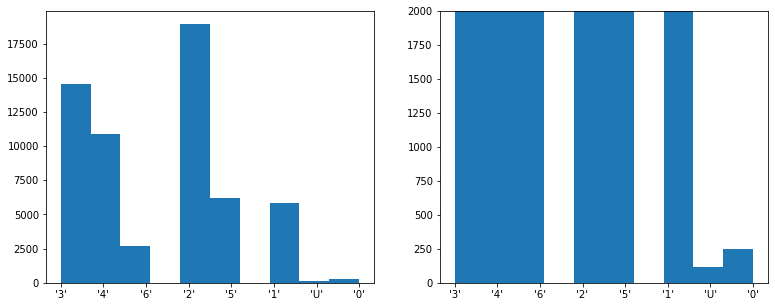

In [11]:
# Age chart
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.hist(data['age'])

plt.subplot(132)
plt.ylim(top=2000)
plt.hist(data['age'])

plt.show()

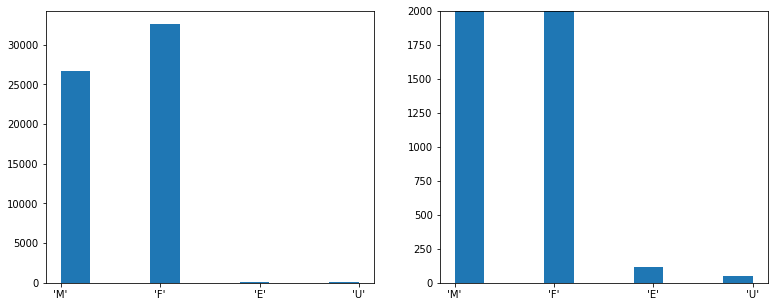

In [12]:
# Gender chart
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.hist(data['gender'])

plt.subplot(132)
plt.ylim(top=2000)
plt.hist(data['gender'])

plt.show()

(array([4518., 5085., 5641., 5853., 6033., 6092., 6446., 6545., 6625.,
        6627.]),
 array([  0. ,  17.9,  35.8,  53.7,  71.6,  89.5, 107.4, 125.3, 143.2,
        161.1, 179. ]),
 <a list of 10 Patch objects>)

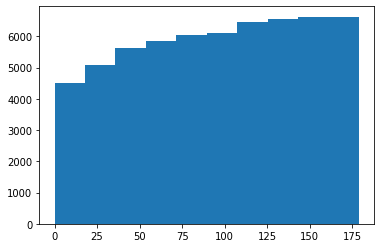

In [13]:
# Step chart
plt.hist(data['step'])

(array([5.375e+04, 1.696e+03, 1.638e+03, 6.600e+02, 2.680e+02, 7.290e+02,
        3.450e+02, 2.280e+02, 1.220e+02, 2.900e+01]),
 array([ 0. ,  4.8,  9.6, 14.4, 19.2, 24. , 28.8, 33.6, 38.4, 43.2, 48. ]),
 <a list of 10 Patch objects>)

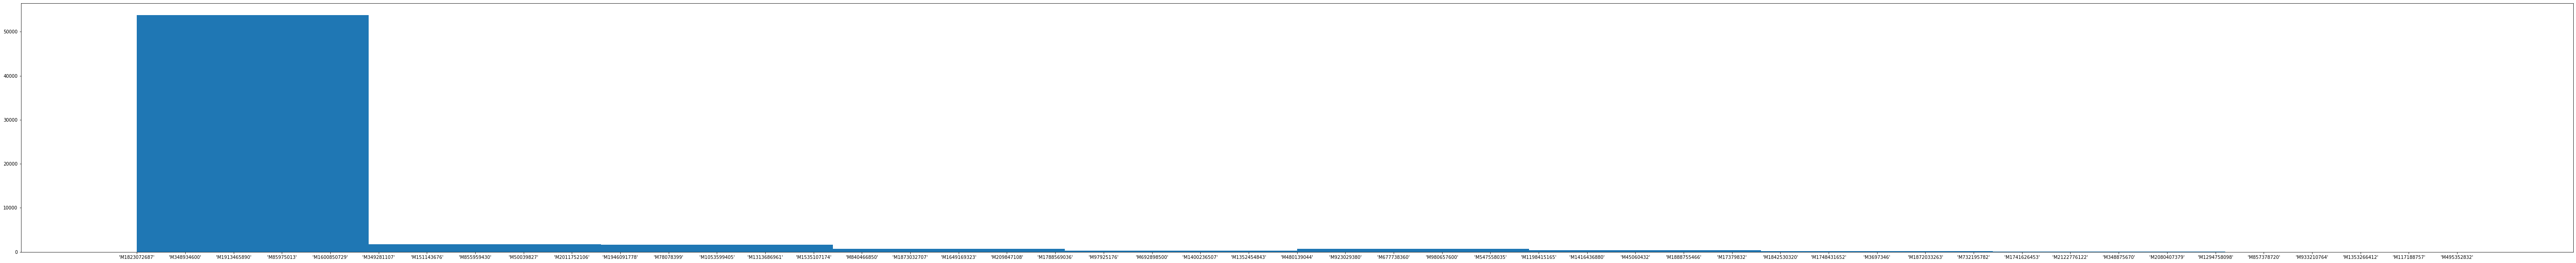

In [14]:
# Merchant chart
plt.figure(figsize=(100,10))
plt.hist(data['merchant'])

In [15]:
data['merchant'].value_counts()

'M1823072687'    29961
'M348934600'     20441
'M85975013'       2624
'M1053599405'      683
'M151143676'       631
'M855959430'       628
'M1946091778'      530
'M1913465890'      422
'M480139044'       387
'M209847108'       377
'M349281107'       316
'M1600850729'      302
'M1535107174'      203
'M980657600'       169
'M78078399'        158
'M1198415165'      146
'M840466850'       131
'M1649169323'      108
'M692898500'        98
'M1888755466'       91
'M50039827'         91
'M547558035'        85
'M1842530320'       77
'M1400236507'       67
'M1313686961'       64
'M732195782'        63
'M97925176'         63
'M45060432'         61
'M677738360'        52
'M1741626453'       49
'M1872033263'       48
'M1352454843'       40
'M2122776122'       37
'M923029380'        36
'M2011752106'       30
'M1416436880'       26
'M1873032707'       24
'M3697346'          24
'M17379832'         21
'M1788569036'       20
'M1294758098'       18
'M1748431652'       16
'M857378720'         9
'M208040737

<h1 style="color:#ff8080"> 
Encode the data with LabelEncoder
</h1>

In [18]:
category = ['age','gender','merchant','category']
for column in category:
        if column in data.columns.values:
            data[column] = LabelEncoder().fit_transform(data[column])
data.head()

,step,age,gender,merchant,category,amount
420925,132,3,2,17,12,0.80
533249,163,4,2,17,12,56.53
107406,39,4,2,29,12,26.42
544468,166,3,1,22,4,7.08
153062,53,6,1,17,12,78.98


In [19]:
# check missing value
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59465 entries, 420925 to 401585
Data columns (total 6 columns):
step        59465 non-null int64
age         59465 non-null int32
gender      59465 non-null int32
merchant    59465 non-null int32
category    59465 non-null int32
amount      59465 non-null float64
dtypes: float64(1), int32(4), int64(1)
memory usage: 2.3 MB


In [20]:
#check unique value in age
data.age.unique()

array([3, 4, 6, 2, 5, 1, 7, 0], dtype=int64)

In [21]:
#check unique value in gendar
data.gender.unique()

array([2, 1, 0, 3], dtype=int64)

In [22]:
#check unique value in category
data.category.unique()

array([12,  4,  3,  2,  0,  7,  6, 14,  1, 11, 10,  5,  9,  8, 13],
      dtype=int64)

In [23]:
#check unique value in merchant
data.merchant.unique()

array([17, 29, 22, 44, 11, 30,  9, 42, 35, 24, 23, 40,  0,  4, 10, 41, 20,
       12, 26, 16, 47, 38,  7,  5, 33, 45, 37, 48, 36,  2,  8, 32, 21, 13,
       18, 15, 31, 19, 39, 14, 27, 28, 25,  3, 43, 46,  6,  1, 34],
      dtype=int64)

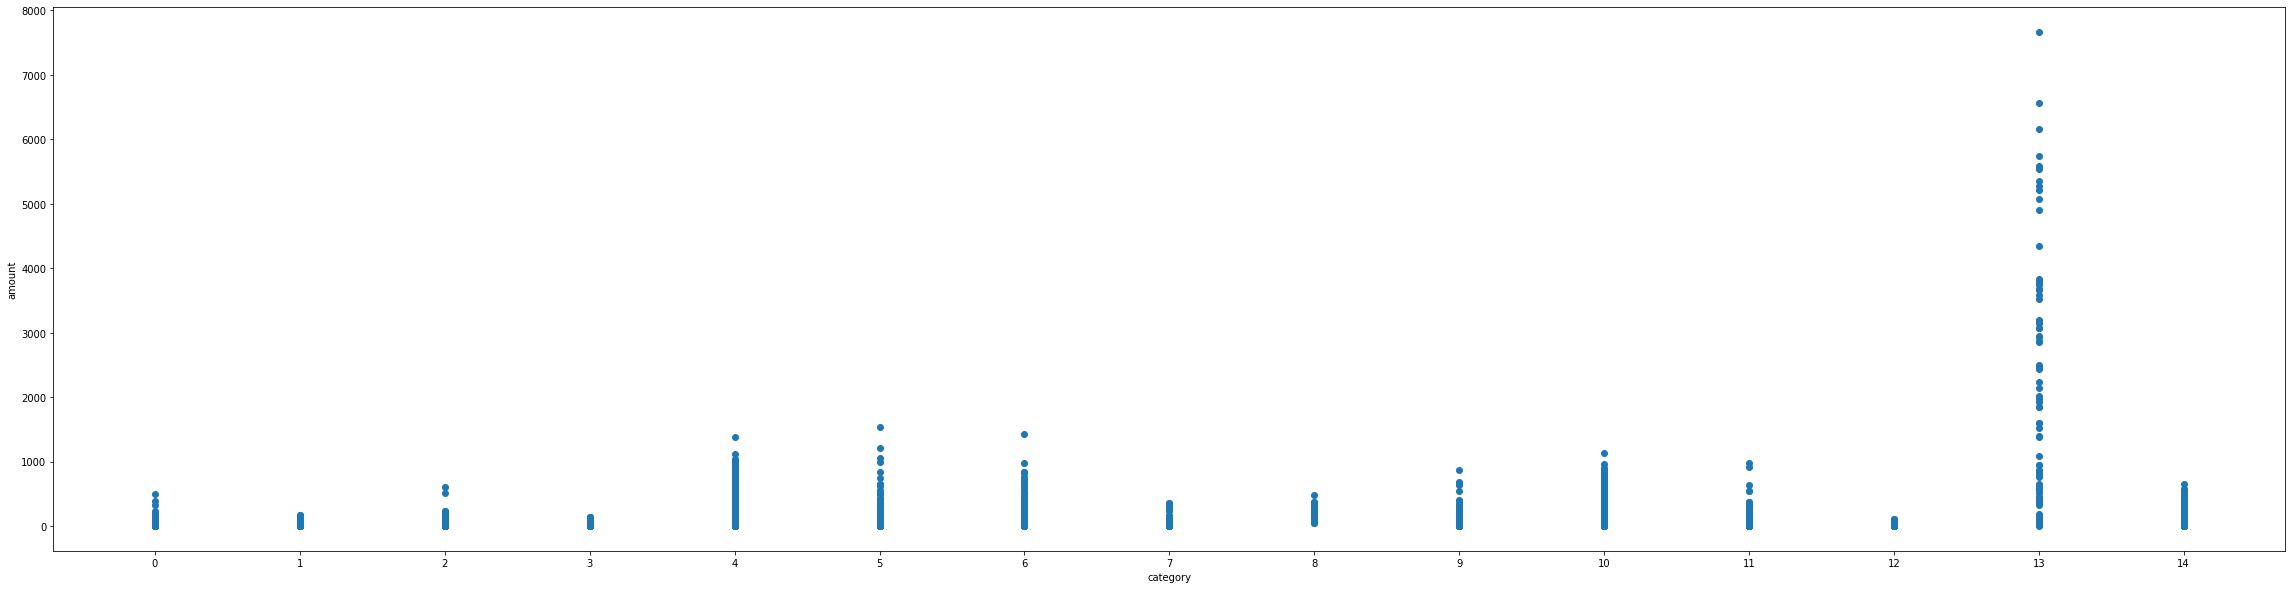

In [24]:
#plot category with amount
plt.figure(figsize=(40,10))
plt.ylabel('amount')
plt.xlabel('category')
plt.scatter(data['category'],data['amount'])
plt.xticks(range(15))
plt.show()

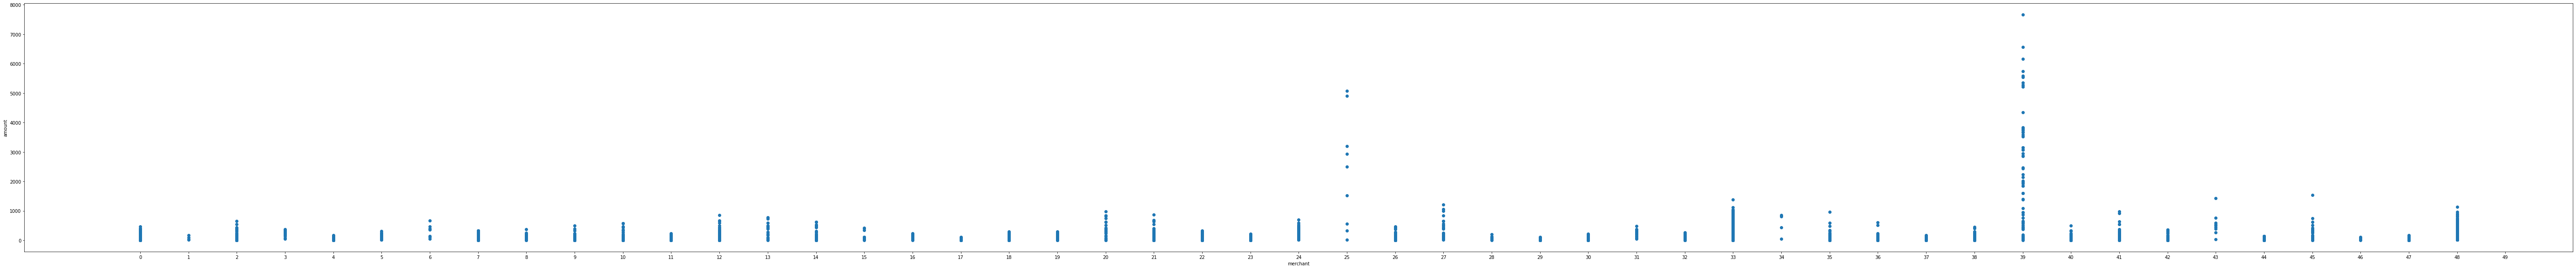

In [25]:
#plot merchant with amount
plt.figure(figsize=(100,10))
plt.ylabel('amount')
plt.xlabel('merchant')
plt.scatter(data['merchant'],data['amount'])
plt.xticks(range(50))
plt.show()

<h1 style="color:#ff8080"> 
PCA
</h1>

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principalComponents)

In [28]:
principalDf.head()

,0,1,2,3,4
0,-37.287297,36.944672,-4.784690,0.427404,-0.009966
1,18.327108,68.146011,-4.227875,0.640402,0.985982
2,-11.265984,-56.247520,4.524255,1.355011,0.976993
3,-31.089352,70.824698,1.847558,-6.934502,0.052244
4,41.182342,-41.726906,-7.298000,0.359129,3.003522


<h1 style="color:#ff8080"> 
First model, Isolation Forest
</h1>

In [29]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(n_estimators=480, max_samples=320,contamination=0.3,behaviour='new')
clf.fit(principalDf)
predict = clf.predict(principalDf)
scores_pred = clf.decision_function(principalDf)

In [31]:
data['scores']= scores_pred
data['anomaly']= predict
data.head()
data.loc[data['anomaly'] == 1,'anomaly'] = 0
data.loc[data['anomaly'] == -1,'anomaly'] = 1
# data.value_counts()
data['anomaly'].value_counts()

0    41625
1    17840
Name: anomaly, dtype: int64

In [35]:
# True positive
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, data['anomaly'])
print(matrix)


[[41625 17120]
 [    0   720]]


In [38]:
# Calculate score
from sklearn.metrics import classification_report
report = classification_report(y_test, data['anomaly'])
print(report)

              precision    recall  f1-score   support

           0       1.00      0.71      0.83     58745
           1       0.04      1.00      0.08       720

   micro avg       0.71      0.71      0.71     59465
   macro avg       0.52      0.85      0.45     59465
weighted avg       0.99      0.71      0.82     59465



<h1 style="color:#ff8080"> 
Second model, Robust Random Cut Forest
</h1>

กำลังทำแจ้